<a href="https://colab.research.google.com/github/fidanfatih/Pycoders_Capstone/blob/main/Pycoders_AutoScout.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction
    ** In this notebook, We will make EDA in 3 stages.**

    . Part-1 : Data Cleansing. It deals with Incorrect Headers, Incorrect Format, Anomalies, Dropping useless columns
    
    . Part-2 : Filling Columns. It deals with Missing Values. Categorical to numeric transformation will be done.

    . Part-3 : Outliers and Final review 

## Import Libraries and Data

In [739]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
warnings.warn("this will not show")

In [740]:
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

In [741]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [742]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AutoScout24/autoscout_data_manuplated.csv')
df = data.copy()
df.shape

(65841, 46)

## METHODS


In [743]:
def show_nans(df, limit):
    missing = df.isnull().sum()*100/df.shape[0]
    return missing.loc[lambda x : x >= limit]

def perc_nans(serial):
    # display percentage of nans in a Series
    return serial.isnull().sum()/serial.shape[0]*100

## Check Data

In [744]:
df.head(2)

,location,url,make,model,short_description,price,mileage,gearbox,registration,fuel_type,power,seller,body_type,type,drivetrain,seats,doors,country_version,offer_number,warranty,Mileage,first_registration,production_date,general_inspection,last_service,full_service_history,non_smoker_vehicle,Power,Gearbox,engine_size,gears,cylinders,empty_weight,Fuel_type,fuel_consumption,co2_emissions,emission_class,\nComfort & Convenience\n,\nEntertainment & Media\n,\nSafety & Security\n,extras,\ncolour,\nmanufacturer_color,\npaint,upholstery_colour,upholstery
0,"WAGENINGEN, NL",https://www.autoscout24.com/offers/audi-a1-1-4-tfsi-122-pk-pro-line-s-line-1-eigenaar-nl-aut-gasoline-red-0b8b559e-e330-4388-a039-f0005168cce7?source=list_searchresults,"\n,Audi ,\n","\n,A1,\n",1.4 TFSI 122 pk Pro Line S-Line 1 eigenaar/ NL-aut,"[['\n', '€ 15,945.-', '\n']]","['', ['42,091 km']]","\n,Automatic,\n",05/2012,"\n,Gasoline,\n","90 kW (122 hp),","['\n', ['Dealer\n']]","\n,Compact,\n","\n,Used,\n","\n,Front,\n",\n4,\n3,"Country version,None",\n82-XDG-9,"\n,None,\n","[['\n'], ['']]",05/2012,None,03/2022,None,"\n,Yes,\n","\n,None,\n","\n,90 kW (122 hp),\n","\n,Automatic,\n","\n,1,390 cc,\n","\n,7,\n","\n,4,\n","\n,1,100 kg,\n","\n,Super 95,\n","['\n', ['5.3 l/100 km (comb.)', '6.5 l/100 km (city)', '4.6 l/100 km (country)'], '\n']","\n,122 g/km (comb.),\n","\n,Euro 5,\n","[['Air conditioning', 'Armrest', 'Automatic climate control', 'Cruise control', 'Electrical side mirrors', 'Leather steering wheel', 'Light sensor', 'Multi-function steering wheel', 'Navigation system', 'Power windows', 'Rain sensor', 'Start-stop system', 'Tinted windows']]","[['CD player', 'Digital radio', 'MP3', 'On-board computer', 'Radio', 'Sound system']]","[['ABS', 'Alarm system', 'Bi-Xenon headlights', 'Central door lock', 'Central door lock with remote control', 'Daytime running lights', 'Driver-side airbag', 'Electronic stability control', 'Fog lights', 'Head airbag', 'Immobilizer', 'LED Daytime Running Lights', 'Passenger-side airbag', 'Power steering', 'Side airbag', 'Traction control', 'Xenon headlights']]","[['Alloy wheels (18"")', 'Sport seats', 'Sport suspension']]","\n4, Red",None,"\npaint, Metallic","\nupholstery, Black","\n8, Part leather"
1,"BREUKELEN, NL",https://www.autoscout24.com/offers/audi-a3-sportback-1-0-tfsi-ultra-s-tronic-sport-lease-edit-gasoline-blue-1b8e0c69-c00b-4721-ac19-e7f49d2046bc?source=list_searchresults,"\n,Audi ,\n","\n,A3,\n",Sportback 1.0 TFSI ultra S tronic sport Lease Edit,"[['\n', '€ 19,490.-', '\n']]","['', ['133,585 km']]","\n,Automatic,\n",05/2017,"\n,Gasoline,\n","85 kW (116 hp),","['\n', ['Dealer\n']]","\n,Compact,\n","\n,Used,\n","\n,Front,\n",\n5,\n5,"Country version,None",\nNV922G,"\n,6 months,\n","[['\n'], ['']]",05/2017,None,None,None,"\n,None,\n","\n,None,\n","\n,85 kW (116 hp),\n","\n,Automatic,\n","\n,999 cc,\n","\n,None,\n","\n,None,\n","\n,1,175 kg,\n","\n,Gasoline,\n","\n,None,\n","['\n', [' ', ' ', ' '], '\n']","\n,Euro 6,\n","[['Air conditioning', 'Armrest', 'Cruise control', 'Electrical side mirrors', 'Leather steering wheel', 'Multi-function steering wheel', 'Navigation system', 'Parking assist system sensors rear', 'Power windows', 'Start-stop system']]","[['CD player', 'On-board computer', 'Radio']]","[['ABS', 'Central door lock', 'Central door lock with remote control', 'Driver-side airbag', 'Electronic stability control', 'Head airbag', 'Immobilizer', 'LED Headlights', 'Passenger-side airbag', 'Power steering', 'Side airbag', 'Tire pressure monitoring system', 'Traction contro']]","[['Alloy wheels', 'Sport suspension']]","\n4, Blue",None,None,"\nupholstery, Black","\n8, Cloth"


In [745]:
df = df.replace("None",np.nan)

In [746]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65841 entries, 0 to 65840
Data columns (total 46 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   location                 object 
 1   url                      object 
 2   make                     object 
 3   model                    object 
 4   short_description        object 
 5   price                    object 
 6   mileage                  object 
 7   gearbox                  object 
 8   registration             object 
 9   fuel_type                object 
 10  power                    object 
 11  seller                   object 
 12  body_type                object 
 13  type                     object 
 14  drivetrain               object 
 15  seats                    object 
 16  doors                    object 
 17  country_version          object 
 18  offer_number             object 
 19  warranty                 object 
 20  Mileage                  object 
 21  first_regist

In [747]:
df.columns

Index(['location', 'url', 'make', 'model', 'short_description', 'price', 'mileage', 'gearbox', 'registration', 'fuel_type', 'power', 'seller', 'body_type', 'type', 'drivetrain', 'seats', 'doors', 'country_version', 'offer_number', 'warranty', 'Mileage', 'first_registration', 'production_date', 'general_inspection', 'last_service', 'full_service_history', 'non_smoker_vehicle', 'Power', 'Gearbox', 'engine_size', 'gears', 'cylinders', 'empty_weight', 'Fuel_type', 'fuel_consumption', 'co2_emissions', 'emission_class', '\nComfort & Convenience\n', '\nEntertainment & Media\n', '\nSafety & Security\n', 'extras', '\ncolour', '\nmanufacturer_color', '\npaint', ' upholstery_colour ', ' upholstery '], dtype='object')

In [748]:
print(*df.columns,sep='\n')

location
url
make
model
short_description
price
mileage
gearbox
registration
fuel_type
power
seller
body_type
type
drivetrain
seats
doors
country_version
offer_number
warranty
Mileage
first_registration
production_date
general_inspection
last_service
full_service_history
non_smoker_vehicle
Power
Gearbox
engine_size
gears
cylinders
empty_weight
Fuel_type
fuel_consumption
co2_emissions
emission_class

Comfort & Convenience


Entertainment & Media


Safety & Security

extras

colour

manufacturer_color

paint
 upholstery_colour 
 upholstery 


In [749]:
df.isnull().sum()

location                         0
url                              0
make                             0
model                            0
short_description              109
price                            0
mileage                          0
gearbox                          0
registration                    46
fuel_type                        0
power                            0
seller                           0
body_type                        0
type                             0
drivetrain                       0
seats                            0
doors                            0
country_version                  0
offer_number                     0
warranty                         0
Mileage                          0
first_registration              45
production_date              58910
general_inspection           15730
last_service                 65841
full_service_history             0
non_smoker_vehicle               0
Power                            0
Gearbox             

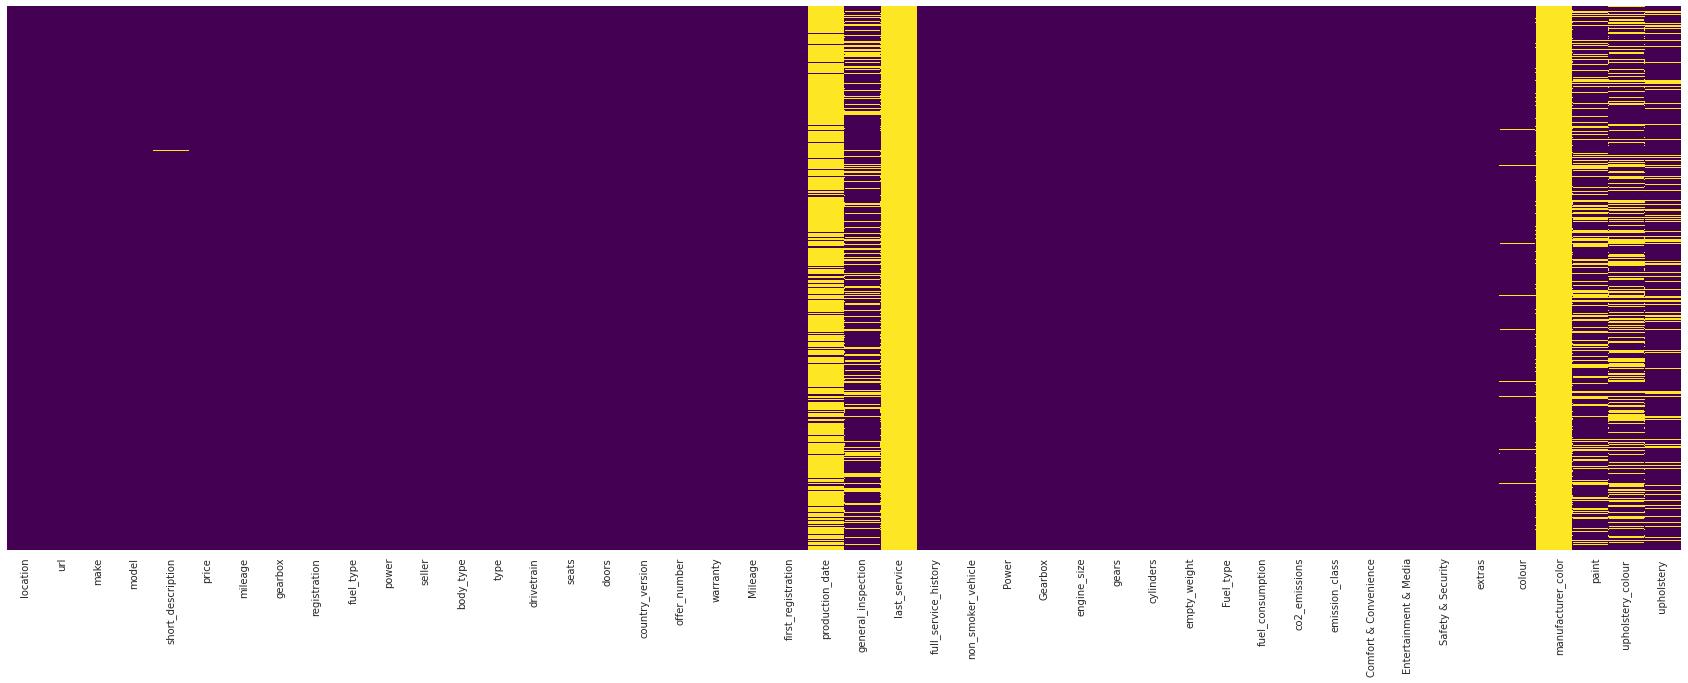

In [750]:
plt.figure(figsize=(30,10))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis');

In [751]:
show_nans(df,0)

location                      0.00
url                           0.00
make                          0.00
model                         0.00
short_description             0.17
price                         0.00
mileage                       0.00
gearbox                       0.00
registration                  0.07
fuel_type                     0.00
power                         0.00
seller                        0.00
body_type                     0.00
type                          0.00
drivetrain                    0.00
seats                         0.00
doors                         0.00
country_version               0.00
offer_number                  0.00
warranty                      0.00
Mileage                       0.00
first_registration            0.07
production_date              89.47
general_inspection           23.89
last_service                100.00
full_service_history          0.00
non_smoker_vehicle            0.00
Power                         0.00
Gearbox             

In [752]:
df.head(1)

,location,url,make,model,short_description,price,mileage,gearbox,registration,fuel_type,power,seller,body_type,type,drivetrain,seats,doors,country_version,offer_number,warranty,Mileage,first_registration,production_date,general_inspection,last_service,full_service_history,non_smoker_vehicle,Power,Gearbox,engine_size,gears,cylinders,empty_weight,Fuel_type,fuel_consumption,co2_emissions,emission_class,\nComfort & Convenience\n,\nEntertainment & Media\n,\nSafety & Security\n,extras,\ncolour,\nmanufacturer_color,\npaint,upholstery_colour,upholstery
0,"WAGENINGEN, NL",https://www.autoscout24.com/offers/audi-a1-1-4-tfsi-122-pk-pro-line-s-line-1-eigenaar-nl-aut-gasoline-red-0b8b559e-e330-4388-a039-f0005168cce7?source=list_searchresults,"\n,Audi ,\n","\n,A1,\n",1.4 TFSI 122 pk Pro Line S-Line 1 eigenaar/ NL-aut,"[['\n', '€ 15,945.-', '\n']]","['', ['42,091 km']]","\n,Automatic,\n",05/2012,"\n,Gasoline,\n","90 kW (122 hp),","['\n', ['Dealer\n']]","\n,Compact,\n","\n,Used,\n","\n,Front,\n",\n4,\n3,"Country version,None",\n82-XDG-9,"\n,None,\n","[['\n'], ['']]",05/2012,NaN,03/2022,nan,"\n,Yes,\n","\n,None,\n","\n,90 kW (122 hp),\n","\n,Automatic,\n","\n,1,390 cc,\n","\n,7,\n","\n,4,\n","\n,1,100 kg,\n","\n,Super 95,\n","['\n', ['5.3 l/100 km (comb.)', '6.5 l/100 km (city)', '4.6 l/100 km (country)'], '\n']","\n,122 g/km (comb.),\n","\n,Euro 5,\n","[['Air conditioning', 'Armrest', 'Automatic climate control', 'Cruise control', 'Electrical side mirrors', 'Leather steering wheel', 'Light sensor', 'Multi-function steering wheel', 'Navigation system', 'Power windows', 'Rain sensor', 'Start-stop system', 'Tinted windows']]","[['CD player', 'Digital radio', 'MP3', 'On-board computer', 'Radio', 'Sound system']]","[['ABS', 'Alarm system', 'Bi-Xenon headlights', 'Central door lock', 'Central door lock with remote control', 'Daytime running lights', 'Driver-side airbag', 'Electronic stability control', 'Fog lights', 'Head airbag', 'Immobilizer', 'LED Daytime Running Lights', 'Passenger-side airbag', 'Power steering', 'Side airbag', 'Traction control', 'Xenon headlights']]","[['Alloy wheels (18"")', 'Sport seats', 'Sport suspension']]","\n4, Red",nan,"\npaint, Metallic","\nupholstery, Black","\n8, Part leather"


> Drop columns that have %65 precentage and higher of missing values.

In [753]:
drop_columns=[
              # 'location', 
              'url', # useless
              # 'make', 
              # 'model', 
              'short_description', # complicated data ---------------------->
              # 'price',
              # 'mileage', 
              # 'gearbox', 
              # 'registration', 
              # 'fuel_type', 
              # 'power', 
              # 'seller',
              # 'body_type', 
              # 'type', 
              # 'drivetrain', 
              # 'seats', 
              # 'doors', 
              'country_version', # useless
              'offer_number', # useless
              # 'warranty', 
              'Mileage', # useless
              # 'first_registration',
              'production_date', # null
              # 'general_inspection', 
              'last_service', #null
              # 'full_service_history', 
              # 'non_smoker_vehicle', 
              'Power', # dublicate column
              'Gearbox', # dublicate column
              # 'engine_size', 
              # 'gears', 
              # 'cylinders', 
              # 'empty_weight', 
              'Fuel_type',# dublicate column
              # 'fuel_consumption', 
              # 'co2_emissions', 
              # 'emission_class',
              # '\nComfort & Convenience\n', 
              # '\nEntertainment & Media\n',
              # '\nSafety & Security\n',
              # 'extras', 
              # '\ncolour', # dublicate column
              '\nmanufacturer_color', # null
              # '\npaint',
              # ' upholstery_colour ',
              # ' upholstery ',
]
df.drop(drop_columns, axis = 1, inplace = True)

In [754]:
df.shape

(65841, 35)

## Percentages of Null Data

In [755]:
show_nans(df,0)

location                     0.00
make                         0.00
model                        0.00
price                        0.00
mileage                      0.00
gearbox                      0.00
registration                 0.07
fuel_type                    0.00
power                        0.00
seller                       0.00
body_type                    0.00
type                         0.00
drivetrain                   0.00
seats                        0.00
doors                        0.00
warranty                     0.00
first_registration           0.07
general_inspection          23.89
full_service_history         0.00
non_smoker_vehicle           0.00
engine_size                  0.00
gears                        0.00
cylinders                    0.00
empty_weight                 0.00
fuel_consumption             0.00
co2_emissions                0.00
emission_class               0.00
\nComfort & Convenience\n    0.00
\nEntertainment & Media\n    0.00
\nSafety & Sec

\> At the begining, focus on the columns that have %15 precentage and higher of missing values. 

In [756]:
show_nans(df,15)

general_inspection    23.89
\npaint               28.16
 upholstery_colour    33.53
 upholstery           16.00
dtype: float64

## Rename Columns

In [757]:
df.columns

Index(['location', 'make', 'model', 'price', 'mileage', 'gearbox', 'registration', 'fuel_type', 'power', 'seller', 'body_type', 'type', 'drivetrain', 'seats', 'doors', 'warranty', 'first_registration', 'general_inspection', 'full_service_history', 'non_smoker_vehicle', 'engine_size', 'gears', 'cylinders', 'empty_weight', 'fuel_consumption', 'co2_emissions', 'emission_class', '\nComfort & Convenience\n', '\nEntertainment & Media\n', '\nSafety & Security\n', 'extras', '\ncolour', '\npaint', ' upholstery_colour ', ' upholstery '], dtype='object')

In [758]:
df.rename(columns={
                  "\nComfort & Convenience\n":"comfort_convenience",
                  "\nEntertainment & Media\n":"entertainment_media",
                  "\nSafety & Security\n":"safety_security",
                  "\ncolour":"colour",
                  "\nmanufacturer_color":"manufacturer_color",
                  "\npaint":"paint",
                  " upholstery_colour ":"upholstery_colour",
                  " upholstery ":"upholstery" },inplace=True)

# 1-Data Cleansing

> Open a header for all columns

## location

In [759]:
perc_nans(df.location)

0.0

In [760]:
df.location.value_counts(dropna=False)

ROTTERDAM, NL       1431
APELDOORN, NL       1176
AMSTERDAM, NL        959
TILBURG, NL          906
HAARLEM, NL          736
                    ... 
Lent, NL               1
NOORDWIJK ZH, NL       1
MAASDRIEL, NL          1
Ittervoort, NL         1
staphorst, NL          1
Name: location, Length: 2288, dtype: int64

In [761]:
df.location = df.location.str.strip(", NL")
df.location = df.location.str.title()

## make

In [762]:
perc_nans(df.make)

0.0

In [763]:
df.make.value_counts(dropna=False)

\n,BMW ,\n              7775
\n,Volkswagen ,\n       7344
\n,Audi ,\n             6344
\n,Mercedes-Benz ,\n    5580
\n,Volvo ,\n            5184
\n,Renault ,\n          4839
\n,Peugeot ,\n          3869
\n,Toyota ,\n           3026
\n,Skoda ,\n            2911
\n,Kia ,\n              2894
\n,Hyundai ,\n          2631
\n,Opel ,\n             2574
\n,Citroen ,\n          2473
\n,Mazda ,\n            2324
\n,Fiat ,\n             2195
\n,Honda ,\n            1045
\n,Ford ,\n              971
\n,Dacia ,\n             937
\n,Chevrolet ,\n         465
\n,Tesla ,\n             460
Name: make, dtype: int64

In [764]:
df.make = df.make.str.split(",").apply(lambda x: x[1])

In [765]:
df.make.value_counts(dropna=False)

BMW               7775
Volkswagen        7344
Audi              6344
Mercedes-Benz     5580
Volvo             5184
Renault           4839
Peugeot           3869
Toyota            3026
Skoda             2911
Kia               2894
Hyundai           2631
Opel              2574
Citroen           2473
Mazda             2324
Fiat              2195
Honda             1045
Ford               971
Dacia              937
Chevrolet          465
Tesla              460
Name: make, dtype: int64

## model

In [766]:
perc_nans(df.model)

0.0

In [767]:
df.model

0         \n,A1,\n
1         \n,A3,\n
2         \n,A3,\n
3         \n,A7,\n
4         \n,A3,\n
           ...    
65836    \n,S60,\n
65837    \n,S60,\n
65838    \n,S40,\n
65839    \n,S60,\n
65840    \n,S60,\n
Name: model, Length: 65841, dtype: object

In [768]:
df.model.value_counts(dropna=False)

\n,A3,\n             1349
\n,Golf,\n           1025
\n,Megane,\n          968
\n,A4,\n              857
\n,2008,\n            851
                     ... 
\n,Elantra,\n           1
\n,CLS,\n               1
\n,S1,\n                1
\n,Trans Sport,\n       1
\n,E 420,\n             1
Name: model, Length: 694, dtype: int64

In [769]:
df.model = df.model.str.split(",").apply(lambda x: x[1])

In [770]:
df.model.value_counts(dropna=False)

A3          1349
Golf        1025
Megane       968
A4           857
2008         851
            ... 
Tacoma         1
S 300          1
Grandeur       1
LT             1
T5 Kombi       1
Name: model, Length: 694, dtype: int64

In [771]:
df['make_model'] = df[['make','model']].apply(lambda x: x[0].strip()+' '+x[1].strip(), axis=1)
df.make_model.value_counts(dropna=False)

Audi A3                     1349
Volkswagen Golf             1025
Renault Megane               968
Audi A4                      857
Peugeot 2008                 851
                            ... 
Hyundai Kona Elektro           1
Chevrolet Trailblazer          1
Toyota Tacoma                  1
Mercedes-Benz GLK 300          1
Mercedes-Benz CLK 55 AMG       1
Name: make_model, Length: 716, dtype: int64

In [772]:
df = df.drop('model', axis=1)

## price

> Target Column

In [773]:
perc_nans(df.price)

0.0

In [774]:
df.price.value_counts(dropna=False).sample(10)

[['\n', '€ 47,843.-', '\n']]      1
[['\n', '€ 56,502.-', '\n']]      1
[['\n', '€ 33,820.-', '\n']]      2
[['\n', '€ 79,500.-', '\n']]      5
[['\n', '€ 119,900.-', '\n']]     3
[['\n', '€ 43,950.-', '\n']]     49
[['\n', '€ 69,450.-', '\n']]      1
[['\n', '€ 75,675.-', '\n']]      1
[['\n', '€ 23,248.-', '\n']]      1
[['\n', '€ 8,600.-', '\n']]       7
Name: price, dtype: int64

In [775]:
df.price = df.price.str.extract('€ (\d*\,*\d*).-')[0].str.replace(",",'').astype('float')
df.price

0       15945.00
1       19490.00
2       19900.00
3       19800.00
4        5950.00
          ...   
65836    2495.00
65837    8950.00
65838    9250.00
65839    1999.00
65840    3950.00
Name: price, Length: 65841, dtype: float64

In [776]:
perc_nans(df.price)

2.2372078188362874

In [777]:
df = df.iloc[df[df.price.notna()==True].index,:]

In [778]:
perc_nans(df.price)

0.0

## mileage

In [779]:
perc_nans(df.mileage)

0.0

In [780]:
# df.mileage.sample(10)
df.mileage

0         ['', ['42,091 km']]
1        ['', ['133,585 km']]
2         ['', ['66,352 km']]
3        ['', ['156,201 km']]
4        ['', ['176,370 km']]
                 ...         
65836    ['', ['413,529 km']]
65837    ['', ['126,181 km']]
65838    ['', ['155,300 km']]
65839    ['', ['442,713 km']]
65840    ['', ['251,723 km']]
Name: mileage, Length: 64368, dtype: object

In [781]:
df.mileage = df.mileage.str.extract('(\d*),(\d*) km').apply(lambda x: x[0]+x[1], axis=1).astype('float')

In [782]:
df.mileage

0        42091.00
1       133585.00
2        66352.00
3       156201.00
4       176370.00
           ...   
65836   413529.00
65837   126181.00
65838   155300.00
65839   442713.00
65840   251723.00
Name: mileage, Length: 64368, dtype: float64

In [783]:
perc_nans(df.mileage)

9.778150633855331

## gearbox

In [784]:
df.gearbox.sample(10)

24273    \n,Automatic,\n
44551    \n,Automatic,\n
18884    \n,Automatic,\n
46932    \n,Automatic,\n
25800    \n,Automatic,\n
2227     \n,Automatic,\n
21128       \n,Manual,\n
30583       \n,Manual,\n
2367     \n,Automatic,\n
11602    \n,Automatic,\n
Name: gearbox, dtype: object

In [785]:
df.gearbox = df.gearbox.str.extract(',(\w*),')

In [786]:
df.gearbox.value_counts(dropna=False)

Automatic    38790
Manual       24895
NaN            683
Name: gearbox, dtype: int64

In [787]:
perc_nans(df.gearbox)

1.061086254039274

## first_registration

In [788]:
perc_nans(df.first_registration)

0.06991051454138703

In [789]:
df.first_registration

0        05/2012
1        05/2017
2        07/2016
3        01/2011
4        04/2005
          ...   
65836    06/2005
65837    03/2005
65838    06/2012
65839    02/2005
65840    10/2005
Name: first_registration, Length: 64368, dtype: object

In [790]:
df.first_registration = df.first_registration.str.extract('/(\d*)').astype('float')

In [791]:
df['age']= 2022 - df.first_registration

In [792]:
df.age.value_counts(dropna=False)

1.00     9099
5.00     6107
6.00     5671
4.00     4655
2.00     4387
7.00     3776
3.00     3389
11.00    3285
10.00    3256
8.00     3135
9.00     3133
12.00    2876
14.00    2331
13.00    2288
15.00    1978
16.00    1706
17.00    1596
0.00     1549
nan        45
18.00      21
19.00      16
20.00      14
21.00      13
22.00       8
25.00       6
23.00       6
26.00       4
29.00       3
24.00       3
27.00       2
30.00       2
37.00       1
28.00       1
46.00       1
-6.00       1
-3.00       1
41.00       1
39.00       1
31.00       1
Name: age, dtype: int64

## registration

In [793]:
data[data['first_registration']!=data['registration']][['first_registration','registration','power','empty_weight']]

,first_registration,registration,power,empty_weight
12810,None,NaN,"240 kW (326 hp),","\n,2,340 kg,\n"
12888,None,NaN,"210 kW (286 hp),","\n,2,185 kg,\n"
12908,None,NaN,"210 kW (286 hp),","\n,2,185 kg,\n"
12909,None,NaN,"210 kW (286 hp),","\n,2,185 kg,\n"
12911,None,NaN,"210 kW (286 hp),","\n,2,185 kg,\n"
14671,None,NaN,"552 kW (751 hp),","\n,None,\n"
14800,None,NaN,"291 kW (396 hp),","\n,None,\n"
14810,None,NaN,"570 kW (775 hp),","\n,None,\n"
14811,None,NaN,"441 kW (600 hp),","\n,2,585 kg,\n"
14812,None,NaN,"570 kW (775 hp),","\n,None,\n"


In [794]:
shifted_rows=[29016,37232,37515,37579,38283,38289,58169,58171]
data.iloc[shifted_rows]

,location,url,make,model,short_description,price,mileage,gearbox,registration,fuel_type,power,seller,body_type,type,drivetrain,seats,doors,country_version,offer_number,warranty,Mileage,first_registration,production_date,general_inspection,last_service,full_service_history,non_smoker_vehicle,Power,Gearbox,engine_size,gears,cylinders,empty_weight,Fuel_type,fuel_consumption,co2_emissions,emission_class,\nComfort & Convenience\n,\nEntertainment & Media\n,\nSafety & Security\n,extras,\ncolour,\nmanufacturer_color,\npaint,upholstery_colour,upholstery
29016,"KERKRADE, NL",https://www.autoscout24.com/offers/volkswagen-caddy-1-6-tdi-airco-trekhaak-diesel-red-639b8616-816e-4bbf-a040-6000d6a3a8bc?source=list_searchresults,"\n,Volkswagen ,\n","['\n', None, '\n']",Caddy 1.6 TDI Airco Trekhaak,"[['\n', '€ 6,950.-', '\n']]","['', ['152,938 km']]","\n,03/2014,\n",75 kW (102 hp),"\n,Manual,\n","2,159 kg,","['\n', ['Diesel\n']]","\n,Panel van,\n","\n,Used,\n","\n,Front,\n",\n2,\n4,"Country version,None",\nVLB16G,"\n,None,\n","[['\n'], ['']]",03/2014,None,New,None,"\n,None,\n","\n,None,\n","\n,75 kW (102 hp),\n","\n,Manual,\n","\n,1,598 cc,\n","\n,5,\n","\n,4,\n","\n,None,\n","\n,Diesel,\n","['\n', ['5.7 l/100 km (comb.)', '6.6 l/100 km (city)', '5.2 l/100 km (country)'], '\n']","\n,149 g/km (comb.),\n","\n,Euro 5,\n","[['Air conditioning', 'Electrical side mirrors', 'Power windows', 'Sliding door right']]",[['On-board computer']],"[['ABS', 'Central door lock', 'Driver-side airbag', 'Electronic stability control', 'Immobilizer', 'Traction contro']]",[['Trailer hitch']],"\n4, Red",None,None,"\nupholstery, Grey","\n8, Other"
37232,"GRONINGEN, NL",https://www.autoscout24.com/offers/citroen-jumpy-bestel-2-0-bluehdi-180-m-driver-19-lmv-diesel-grey-d2fdf1cc-fb6c-45aa-b09a-26fc38d4e560?source=list_suggestedresults,"\n,Citroen ,\n","['\n', None, '\n']",Jumpy bestel 2.0 BlueHDI 180 M Driver | 19'' LMV |,"[['\n', '€ 28,989.-', '\n']]","['', ['4,997 km']]","\n,09/2021,\n",130 kW (177 hp),"\n,Automatic,\n","2,735 kg,","['\n', ['Diesel\n']]","\n,Panel van,\n","\n,Used,\n","\n,Front,\n",\n2,\n5,"Country version,Netherlands",\nVLL62P,"\n,6 months,\n","[['\n'], ['']]",09/2021,None,New,None,"\n,Yes,\n","\n,None,\n","\n,130 kW (177 hp),\n","\n,Automatic,\n","\n,1,997 cc,\n","\n,None,\n","\n,4,\n","\n,None,\n","\n,Diesel,\n","\n,None,\n","['\n', [' ', ' ', ' '], '\n']","\n,Euro 6,\n","[['Air conditioning', 'Armrest', 'Automatic climate control', 'Cruise control', 'Electrical side mirrors', 'Heads-up display', 'Hill Holder', 'Keyless central door lock', 'Leather steering wheel', 'Light sensor', 'Lumbar support', 'Multi-function steering wheel', 'Navigation system', 'Parking assist system camera', 'Parking assist system sensors front', 'Parking assist system sensors rear', 'Power windows', 'Rain sensor', 'Sliding door right']]","[['Android Auto', 'Apple CarPlay', 'Digital radio', 'On-board computer', 'Radio']]","[['ABS', 'Adaptive Cruise Control', 'Alarm system', 'Blind spot monitor', 'Central door lock', 'Central door lock with remote control', 'Daytime running lights', 'Driver drowsiness detection', 'Driver-side airbag', 'Electronic stability control', 'Emergency brake assistant', 'Fog lights', 'High beam assist', 'Immobilizer', 'LED Daytime Running Lights', 'Lane departure warning system', 'Passenger-side airbag', 'Side airbag', 'Tire pressure monitoring system', 'Traction control', 'Traffic sign...","[['Alloy wheels (17"")', 'Trailer hitch', 'Voice Contro']]","\n4, Grey",None,"\npaint, Metallic",None,None
37515,"GRONINGEN, NL",https://www.autoscout24.com/offers/citroen-jumpy-bestel-2-0-bluehdi-180-m-driver-19-lmv-diesel-grey-d2fdf1cc-fb6c-45aa-b09a-26fc38d4e560?source=list_searchresults,"\n,Citroen ,\n","['\n', None, '\n']",Jumpy bestel 2.0 BlueHDI 180 M Driver | 19'' LMV |,"[['\n', '€ 28,989.-', '\n']]","['', ['4,997 km']]","\n,09/2021,\n",130 kW (177 hp),"\n,Automatic,\n","2,735 kg,","['\n', ['Diesel\n']]","\n,Panel van,\n","\n,Used,\n","\n,Front,\n",\n2,\n5,"

In [795]:
df.loc[shifted_rows,['empty_weight']] = df.loc[shifted_rows,['power']]
df.loc[shifted_rows,['power']] = df.loc[shifted_rows,['registration']]

In [796]:
df = df.drop(['registration','first_registration'],axis=1)

## fuel_type

In [797]:
perc_nans(df.fuel_type)

0.0

In [798]:
df.fuel_type

0        \n,Gasoline,\n
1        \n,Gasoline,\n
2        \n,Gasoline,\n
3        \n,Gasoline,\n
4        \n,Gasoline,\n
              ...      
65836         \n,LPG,\n
65837         \n,LPG,\n
65838     \n,Ethanol,\n
65839         \n,LPG,\n
65840         \n,CNG,\n
Name: fuel_type, Length: 64368, dtype: object

In [799]:
df.fuel_type = df.fuel_type.str.split(",").apply(lambda x: x[1])

In [800]:
df.fuel_type.value_counts(dropna=False)

Gasoline             37191
Diesel               12343
Electric/Gasoline     8645
Electric              5185
LPG                    486
Electric/Diesel        292
CNG                    105
Hydrogen                88
Others                  11
Ethanol                  9
Automatic                9
Manual                   2
 None                    2
Name: fuel_type, dtype: int64

## power

1 kW = 1.359622 hp

In [801]:
perc_nans(df.power) 

0.012428535918468804

In [802]:
df.power

0         90 kW (122 hp),
1         85 kW (116 hp),
2        110 kW (150 hp),
3        221 kW (300 hp),
4        147 kW (200 hp),
               ...       
65836    103 kW (140 hp),
65837    104 kW (141 hp),
65838    107 kW (145 hp),
65839    103 kW (140 hp),
65840    103 kW (140 hp),
Name: power, Length: 64368, dtype: object

In [803]:
df.power = df.power.str.extract('(\d*) hp')

In [804]:
perc_nans(df.power)

8.856885408898831

In [805]:
df.columns

Index(['location', 'make', 'price', 'mileage', 'gearbox', 'fuel_type', 'power', 'seller', 'body_type', 'type', 'drivetrain', 'seats', 'doors', 'warranty', 'general_inspection', 'full_service_history', 'non_smoker_vehicle', 'engine_size', 'gears', 'cylinders', 'empty_weight', 'fuel_consumption', 'co2_emissions', 'emission_class', 'comfort_convenience', 'entertainment_media', 'safety_security', 'extras', 'colour', 'paint', 'upholstery_colour', 'upholstery', 'make_model', 'age'], dtype='object')

## seller

In [806]:
perc_nans(df.seller) 

0.0

In [807]:
df.seller.value_counts()

['\n', ['Dealer\n']]            59529
['\n', ['Private seller\n']]     4828
['\n', ['Gasoline\n']]              4
['\n', ['Diesel\n']]                4
['\n', ['Electric\n']]              3
Name: seller, dtype: int64

In [808]:
df.seller =df.seller.str.extract(' \W*(\w*)\\n*')

In [809]:
df.seller.value_counts()

Dealer      59529
Private      4828
Diesel          4
Gasoline        4
Electric        3
Name: seller, dtype: int64

## body_type

In [810]:
perc_nans(df.body_type)

0.0

In [811]:
df.body_type.value_counts(dropna=False)

\n,Off-Road/Pick-up,\n    17436
\n,Compact,\n             13909
\n,Station wagon,\n       11959
\n,Van,\n                  6756
\n,Sedan,\n                5652
\n,Convertible,\n          3045
\n,Transporter,\n          2229
\n,Coupe,\n                1945
\n,None,\n                  848
\n,Other,\n                 583
\n,Panel van,\n               3
\n,Flatbed van,\n             2
\n,Car transport,\n           1
Name: body_type, dtype: int64

In [812]:
df.body_type = df.body_type.apply(lambda x:x.split(',')[1])

In [813]:
df.body_type.value_counts(dropna=False)

Off-Road/Pick-up    17436
Compact             13909
Station wagon       11959
Van                  6756
Sedan                5652
Convertible          3045
Transporter          2229
Coupe                1945
None                  848
Other                 583
Panel van               3
Flatbed van             2
Car transport           1
Name: body_type, dtype: int64

## type

In [814]:
perc_nans(df.type)

0.0

In [815]:
df.type.value_counts(dropna=False)

\n,Used,\n                 56380
\n,New,\n                   4044
\n,Demonstration,\n         2029
\n,Pre-registered,\n        1066
\n,None,\n                   848
\n,Antique / Classic,\n        1
Name: type, dtype: int64

In [816]:
df.type = df.type.apply(lambda x:x.split(',')[1])

In [817]:
df.type.value_counts(dropna=False)

Used                 56380
New                   4044
Demonstration         2029
Pre-registered        1066
None                   848
Antique / Classic        1
Name: type, dtype: int64

## drivetrain

In [818]:
perc_nans(df.drivetrain)

0.0

In [819]:
df.drivetrain.sample(10)

36191    \n,Front,\n
19417    \n,Front,\n
2955     \n,Front,\n
30616    \n,Front,\n
43177    \n,Front,\n
2785     \n,Front,\n
4659     \n,Front,\n
50139    \n,Front,\n
61440     \n,None,\n
53514     \n,None,\n
Name: drivetrain, dtype: object

In [820]:
df.drivetrain = df.drivetrain.apply(lambda x:x.split(',')[1])

In [821]:
df.drivetrain.value_counts(dropna=False)

Front    34729
None     14588
4WD       7698
Rear      7353
Name: drivetrain, dtype: int64

In [822]:
df.columns

Index(['location', 'make', 'price', 'mileage', 'gearbox', 'fuel_type', 'power', 'seller', 'body_type', 'type', 'drivetrain', 'seats', 'doors', 'warranty', 'general_inspection', 'full_service_history', 'non_smoker_vehicle', 'engine_size', 'gears', 'cylinders', 'empty_weight', 'fuel_consumption', 'co2_emissions', 'emission_class', 'comfort_convenience', 'entertainment_media', 'safety_security', 'extras', 'colour', 'paint', 'upholstery_colour', 'upholstery', 'make_model', 'age'], dtype='object')

## seats

In [823]:
perc_nans(df.seats)

0.0

In [824]:
df.seats.unique()

array(['\n4', '\n5', 'None\n', '\n2', '\n6', '\n7', '\n3', '\n8', '\n9',
       '\n1'], dtype=object)

In [825]:
df.seats = df.seats.str.extract('(\d)')

In [826]:
df.seats.value_counts(dropna=False)

5      48302
4       6196
NaN     4940
7       1986
2       1718
3        853
6        259
8         57
9         54
1          3
Name: seats, dtype: int64

## doors

In [827]:
perc_nans(df.doors)

0.0

In [828]:
df.doors.sample(10)

2937     \n4
34137    \n5
20389    \n4
22264    \n5
34616    \n5
48607    \n2
51854    \n4
14981    \n5
46112    \n5
52802    \n5
Name: doors, dtype: object

In [829]:
df.doors = df.doors.str.extract('(\d)')

In [830]:
df.doors.value_counts(dropna=False)

5      47683
4       8631
2       4659
3       2272
NaN     1044
6         75
1          4
Name: doors, dtype: int64

## warranty

In [831]:
df.warranty.value_counts()

\n,None,\n         41751
\n,6 months,\n     17683
\n,3 months,\n      1767
\n,12 months,\n     1467
\n,24 months,\n     1142
\n,84 months,\n      252
\n,1 months,\n       232
\n,18 months,\n       34
\n,36 months,\n       15
\n,2 months,\n         8
\n,48 months,\n        7
\n,Yes,\n              3
\n,60 months,\n        2
\n,10 months,\n        1
\n,9 months,\n         1
\n,4 months,\n         1
\n,26 months,\n        1
\n,5 months,\n         1
Name: warranty, dtype: int64

In [832]:
df.warranty = df.warranty.replace('\n,Yes,\n','\n,1 months,\n')

In [833]:
df.warranty = df.warranty.str.extract(',(\d*) months')

In [834]:
df.warranty.value_counts(dropna=False)

NaN    41751
6      17683
3       1767
12      1467
24      1142
84       252
1        235
18        34
36        15
2          8
48         7
60         2
10         1
9          1
5          1
26         1
4          1
Name: warranty, dtype: int64

In [835]:
perc_nans(df.warranty)

64.86297539149888

## general_inspection

In [836]:
df.general_inspection.sample(20)

64010    05/2022
44852        NaN
39618    05/2022
55895    10/2022
65183    04/2024
48107        New
2901     01/2022
24506    08/2022
36100        New
54871        New
7203     11/2022
24305        NaN
8621         New
48065        New
36704        New
48898        NaN
38149    12/2022
24726        New
18772    03/2022
19060        NaN
Name: general_inspection, dtype: object

In [837]:
df.general_inspection = df.general_inspection.replace('New','01/2022')
df.general_inspection = df.general_inspection.fillna('1/0')

In [838]:
df.general_inspection = df.general_inspection.str.split('/').apply(lambda x: (int(x[1]) - 2022) * 12 + int(x[0]) - 1)

In [839]:
df.general_inspection.value_counts(dropna=False).sort_index()

-24264    15462
-62           2
-61           1
-52           1
-50           1
-49           1
-48           1
-40           1
-39           1
-35           1
-34           1
-33           2
-31           2
-30           2
-28           1
-26           1
-25           1
-24           1
-23           1
-22           2
-19           4
-18           6
-17           1
-16           3
-15           4
-14           2
-13           7
-12           8
-11           3
-10          11
-9           12
-8           10
-7           11
-6           29
-5           26
-4           46
-3           57
-2          102
-1          132
 0        16833
 1         1567
 2         2006
 3         1708
 4         1890
 5         2169
 6         1916
 7         1604
 8         1746
 9         1794
 10        1826
 11        1508
 12         822
 13         490
 14         496
 15         482
 16         517
 17         530
 18         501
 19         420
 20         392
 21         432
 22         471
 23     

In [840]:
df.general_inspection = df['general_inspection'].where(df.general_inspection>=0)

In [841]:
df.general_inspection.value_counts(dropna=False).sort_index()

0.00     16833
1.00      1567
2.00      2006
3.00      1708
4.00      1890
5.00      2169
6.00      1916
7.00      1604
8.00      1746
9.00      1794
10.00     1826
11.00     1508
12.00      822
13.00      490
14.00      496
15.00      482
16.00      517
17.00      530
18.00      501
19.00      420
20.00      392
21.00      432
22.00      471
23.00      360
24.00      276
25.00      222
26.00      149
27.00       79
28.00      125
29.00      212
30.00      289
31.00      198
32.00      295
33.00      260
34.00      210
35.00      414
36.00      273
37.00      290
38.00      395
39.00      288
40.00      286
41.00      383
42.00      248
43.00      193
44.00      244
45.00      248
46.00      243
47.00       83
48.00        4
49.00        3
50.00        1
51.00        3
52.00        6
53.00        6
54.00        1
58.00        1
nan      15960
Name: general_inspection, dtype: int64

## full_service_history

In [842]:
df.full_service_history.sample(20)

49684     \n,Yes,\n
63140    \n,None,\n
64588     \n,Yes,\n
51181     \n,Yes,\n
47066    \n,None,\n
62141    \n,None,\n
22386    \n,None,\n
19370     \n,Yes,\n
60051     \n,Yes,\n
25220    \n,None,\n
44709     \n,Yes,\n
4046      \n,Yes,\n
52381    \n,None,\n
33491    \n,None,\n
32289     \n,Yes,\n
21094     \n,Yes,\n
60820     \n,Yes,\n
8533     \n,None,\n
20978    \n,None,\n
62324     \n,Yes,\n
Name: full_service_history, dtype: object

In [843]:
df.full_service_history = df.full_service_history.str.extract(',(\w*),')

In [844]:
df.full_service_history.value_counts(dropna=False)

Yes     44955
None    19413
Name: full_service_history, dtype: int64

## non_smoker_vehicle

In [845]:
df.non_smoker_vehicle

0        \n,None,\n
1        \n,None,\n
2        \n,None,\n
3        \n,None,\n
4        \n,None,\n
            ...    
65836    \n,None,\n
65837    \n,None,\n
65838    \n,None,\n
65839    \n,None,\n
65840    \n,None,\n
Name: non_smoker_vehicle, Length: 64368, dtype: object

In [846]:
df.non_smoker_vehicle = df.non_smoker_vehicle.str.extract(',(\w*),')

In [847]:
df.non_smoker_vehicle.value_counts(dropna=False)

None    59393
Yes      4975
Name: non_smoker_vehicle, dtype: int64

## engine_size

In [848]:
df.engine_size

0        \n,1,390 cc,\n
1          \n,999 cc,\n
2        \n,1,395 cc,\n
3        \n,2,995 cc,\n
4        \n,1,984 cc,\n
              ...      
65836    \n,2,435 cc,\n
65837    \n,2,435 cc,\n
65838    \n,1,999 cc,\n
65839    \n,2,435 cc,\n
65840    \n,2,435 cc,\n
Name: engine_size, Length: 64368, dtype: object

In [849]:
df.engine_size = df.engine_size.str.extract('(\d,\d*)')

In [850]:
df.engine_size = df.engine_size.str.replace(',','').astype('float')

In [851]:
df.engine_size.value_counts(dropna=False)

nan        10540
1598.00     5207
1998.00     2858
1395.00     2424
1969.00     2281
           ...  
2902.00        1
3190.00        1
2990.00        1
2264.00        1
3724.00        1
Name: engine_size, Length: 372, dtype: int64

In [852]:
df = df.rename(columns={"engine_size": "engine_size_cc"})

## gears

In [853]:
df.gears

0           \n,7,\n
1        \n,None,\n
2           \n,8,\n
3        \n,None,\n
4           \n,6,\n
            ...    
65836       \n,5,\n
65837       \n,5,\n
65838       \n,5,\n
65839       \n,5,\n
65840       \n,5,\n
Name: gears, Length: 64368, dtype: object

In [854]:
df.gears = df.gears.str.extract(',(\d),')

In [855]:
df.gears.value_counts(dropna=False)

6      19791
NaN    18234
5       9747
7       7689
8       5649
1       1610
9       1098
4        511
2         35
3          4
Name: gears, dtype: int64

## cylinders

In [856]:
 df.cylinders

0           \n,4,\n
1        \n,None,\n
2           \n,4,\n
3           \n,6,\n
4           \n,4,\n
            ...    
65836       \n,5,\n
65837       \n,5,\n
65838       \n,4,\n
65839       \n,5,\n
65840       \n,5,\n
Name: cylinders, Length: 64368, dtype: object

In [857]:
df.cylinders = df.cylinders.str.extract(',(\d),')

In [858]:
df.cylinders.value_counts(dropna=False)

4      43525
3       7986
NaN     5979
6       4049
5       1089
8        866
1        445
2        428
7          1
Name: cylinders, dtype: int64

## empty_weight

In [859]:
df.empty_weight

0        \n,1,100 kg,\n
1        \n,1,175 kg,\n
2        \n,1,210 kg,\n
3        \n,1,745 kg,\n
4            \n,None,\n
              ...      
65836    \n,1,496 kg,\n
65837    \n,1,475 kg,\n
65838    \n,1,260 kg,\n
65839    \n,1,441 kg,\n
65840    \n,1,489 kg,\n
Name: empty_weight, Length: 64368, dtype: object

In [860]:
df.empty_weight =df.empty_weight.str.extract('(\d,\d*)')

In [861]:
df.empty_weight = df.empty_weight.str.replace(',','').astype('float')

In [862]:
df.empty_weight.value_counts(dropna=False)

nan        4611
1295.00    1509
1405.00    1327
1635.00     905
1515.00     713
           ... 
2602.00       1
1981.00       1
1796.00       1
2810.00       1
2394.00       1
Name: empty_weight, Length: 1339, dtype: int64

In [863]:
df = df.rename(columns={"empty_weight": "empty_weight_kg"})

## fuel_consumption

In [864]:
df.fuel_consumption

0          ['\n', ['5.3 l/100 km (comb.)', '6.5 l/100 km (city)', '4.6 l/100 km (country)'], '\n']
1                                                                                       \n,None,\n
2            ['\n', ['4.6 l/100 km (comb.)', '5.7 l/100 km (city)', '4 l/100 km (country)'], '\n']
3         ['\n', ['8.2 l/100 km (comb.)', '10.8 l/100 km (city)', '6.6 l/100 km (country)'], '\n']
4                                                 ['\n', ['7.7 l/100 km (comb.)', ' ', ' '], '\n']
                                                   ...                                            
65836     ['\n', ['9.5 l/100 km (comb.)', '13.6 l/100 km (city)', '7.1 l/100 km (country)'], '\n']
65837       ['\n', ['9.5 l/100 km (comb.)', '13.8 l/100 km (city)', '7 l/100 km (country)'], '\n']
65838    ['\n', ['10.6 l/100 km (comb.)', '14.8 l/100 km (city)', '8.2 l/100 km (country)'], '\n']
65839                                                                                   \n,None,\n
65840     

In [865]:
df.fuel_consumption[0]

"['\\n', ['5.3 l/100 km (comb.)', '6.5 l/100 km (city)', '4.6 l/100 km (country)'], '\\n']"

In [866]:
df['fuel_consumption_mean'] = df.fuel_consumption.str.extract('(\d*\.\d*) l\/100 km \(comb').astype('float')

In [867]:
df['fuel_consumption_city'] = df.fuel_consumption.str.extract('(\d*\.\d*) l\/100 km \(city').astype('float')

In [868]:
df['fuel_consumption_country'] = df.fuel_consumption.str.extract('(\d*\.\d*) l\/100 km \(country').astype('float')

In [869]:
df = df.drop(['fuel_consumption'], axis=1)

## co2_emissions

In [870]:
df.co2_emissions

0               \n,122 g/km (comb.),\n
1        ['\n', [' ', ' ', ' '], '\n']
2               \n,106 g/km (comb.),\n
3               \n,190 g/km (comb.),\n
4                           \n,None,\n
                     ...              
65836           \n,226 g/km (comb.),\n
65837           \n,227 g/km (comb.),\n
65838           \n,174 g/km (comb.),\n
65839    ['\n', [' ', ' ', ' '], '\n']
65840           \n,159 g/km (comb.),\n
Name: co2_emissions, Length: 64368, dtype: object

In [871]:
df.co2_emissions= df.co2_emissions.str.extract(',(\d*)')

In [872]:
df.co2_emissions.value_counts(dropna=False)

       16625
0       5561
139     1147
119      954
149      881
       ...  
359        1
65         1
372        1
303        1
301        1
Name: co2_emissions, Length: 333, dtype: int64

In [873]:
df.loc[df[df.co2_emissions==''].index,'co2_emissions']=np.nan

## emission_class

In [874]:
df.emission_class

0        \n,Euro 5,\n
1        \n,Euro 6,\n
2        \n,Euro 6,\n
3        \n,Euro 5,\n
4          \n,None,\n
             ...     
65836    \n,Euro 4,\n
65837    \n,Euro 4,\n
65838    \n,Euro 5,\n
65839      \n,None,\n
65840      \n,None,\n
Name: emission_class, Length: 64368, dtype: object

In [875]:
df.emission_class = df.emission_class.str.extract(',(\w+\s*\d*)')

In [876]:
df.emission_class.value_counts(dropna=False)

None      22271
Euro 6    21922
Euro 5    11730
Euro 4     7038
NaN         532
Euro 1      475
Euro 3      391
Euro 2        9
Name: emission_class, dtype: int64

## comfort_convenience

In [877]:
df.comfort_convenience

0                                                                                                        [['Air conditioning', 'Armrest', 'Automatic climate control', 'Cruise control', 'Electrical side mirrors', 'Leather steering wheel', 'Light sensor', 'Multi-function steering wheel', 'Navigation system', 'Power windows', 'Rain sensor', 'Start-stop system', 'Tinted windows']]
1                                                                                                                                                [['Air conditioning', 'Armrest', 'Cruise control', 'Electrical side mirrors', 'Leather steering wheel', 'Multi-function steering wheel', 'Navigation system', 'Parking assist system sensors rear', 'Power windows', 'Start-stop system']]
2                                              [['Air conditioning', 'Armrest', 'Automatic climate control', 'Cruise control', 'Electrical side mirrors', 'Hill Holder', 'Leather steering wheel', 'Light sensor', 'Lumbar support', 'Multi-func

In [878]:
df.comfort_convenience = df.comfort_convenience.str.strip("[']").str.split("', '")

In [879]:
df.comfort_convenience

0                                                                                                    [Air conditioning, Armrest, Automatic climate control, Cruise control, Electrical side mirrors, Leather steering wheel, Light sensor, Multi-function steering wheel, Navigation system, Power windows, Rain sensor, Start-stop system, Tinted windows]
1                                                                                                                                      [Air conditioning, Armrest, Cruise control, Electrical side mirrors, Leather steering wheel, Multi-function steering wheel, Navigation system, Parking assist system sensors rear, Power windows, Start-stop system]
2                                              [Air conditioning, Armrest, Automatic climate control, Cruise control, Electrical side mirrors, Hill Holder, Leather steering wheel, Light sensor, Lumbar support, Multi-function steering wheel, Navigation system, Parking assist system sensors rear, Power wi

## entertainment_media

In [880]:
df.entertainment_media

0                                                                       [['CD player', 'Digital radio', 'MP3', 'On-board computer', 'Radio', 'Sound system']]
1                                                                                                               [['CD player', 'On-board computer', 'Radio']]
2        [['Bluetooth', 'Digital cockpit', 'Hands-free equipment', 'Integrated music streaming', 'MP3', 'On-board computer', 'Radio', 'Sound system', 'USB']]
3                                                                                                                                                 [['Radio']]
4                                                                                                                                    [['CD player', 'Radio']]
                                                                                 ...                                                                         
65836                                               

In [881]:
df.entertainment_media = df.entertainment_media.str.strip("[']").str.split("', '")

In [882]:
df.entertainment_media

0                                                                 [CD player, Digital radio, MP3, On-board computer, Radio, Sound system]
1                                                                                                   [CD player, On-board computer, Radio]
2        [Bluetooth, Digital cockpit, Hands-free equipment, Integrated music streaming, MP3, On-board computer, Radio, Sound system, USB]
3                                                                                                                                 [Radio]
4                                                                                                                      [CD player, Radio]
                                                                       ...                                                               
65836                                                                                                                 [On-board computer]
65837                             

## safety_security

In [883]:
df.safety_security

0              [['ABS', 'Alarm system', 'Bi-Xenon headlights', 'Central door lock', 'Central door lock with remote control', 'Daytime running lights', 'Driver-side airbag', 'Electronic stability control', 'Fog lights', 'Head airbag', 'Immobilizer', 'LED Daytime Running Lights', 'Passenger-side airbag', 'Power steering', 'Side airbag', 'Traction control', 'Xenon headlights']]
1                                                                                           [['ABS', 'Central door lock', 'Central door lock with remote control', 'Driver-side airbag', 'Electronic stability control', 'Head airbag', 'Immobilizer', 'LED Headlights', 'Passenger-side airbag', 'Power steering', 'Side airbag', 'Tire pressure monitoring system', 'Traction contro']]
2        [['ABS', 'Central door lock', 'Central door lock with remote control', 'Daytime running lights', 'Driver-side airbag', 'Electronic stability control', 'Fog lights', 'Full-LED headlights', 'Head airbag', 'Immobilizer', 'Isofix', 'LED Da

In [884]:
df.safety_security = df.safety_security.str.strip("[']").str.split("', '")

In [885]:
df.safety_security

0            [ABS, Alarm system, Bi-Xenon headlights, Central door lock, Central door lock with remote control, Daytime running lights, Driver-side airbag, Electronic stability control, Fog lights, Head airbag, Immobilizer, LED Daytime Running Lights, Passenger-side airbag, Power steering, Side airbag, Traction control, Xenon headlights]
1                                                                                 [ABS, Central door lock, Central door lock with remote control, Driver-side airbag, Electronic stability control, Head airbag, Immobilizer, LED Headlights, Passenger-side airbag, Power steering, Side airbag, Tire pressure monitoring system, Traction contro]
2        [ABS, Central door lock, Central door lock with remote control, Daytime running lights, Driver-side airbag, Electronic stability control, Fog lights, Full-LED headlights, Head airbag, Immobilizer, Isofix, LED Daytime Running Lights, LED Headlights, Passenger-side airbag, Power steering, Rear airbag, Side airba

## extras

In [886]:
df.extras

0                                                                              [['Alloy wheels (18")', 'Sport seats', 'Sport suspension']]
1                                                                                                   [['Alloy wheels', 'Sport suspension']]
2        [['Alloy wheels (17")', 'Ambient lighting', 'Electronic parking brake', 'Roof rack', 'Spoiler', 'Sport package', 'Voice Contro']]
3                                                                        [['Alloy wheels (18")', 'Automatically dimming interior mirror']]
4                                                   [['Alloy wheels (17")', 'Headlight washer system', 'Sport seats', 'Sport suspension']]
                                                                       ...                                                                
65836                                                                    [['Alloy wheels (15")', 'Automatically dimming interior mirror']]
65837                      

In [887]:
# df.extras.str.replace("'\'","").str.replace("\''","")

In [888]:
df.extras = df.extras.str.strip("[']").str.split("', '")

In [889]:
df.extras

0                                                                      [Alloy wheels (18"), Sport seats, Sport suspension]
1                                                                                         [Alloy wheels, Sport suspension]
2        [Alloy wheels (17"), Ambient lighting, Electronic parking brake, Roof rack, Spoiler, Sport package, Voice Contro]
3                                                              [Alloy wheels (18"), Automatically dimming interior mirror]
4                                             [Alloy wheels (17"), Headlight washer system, Sport seats, Sport suspension]
                                                               ...                                                        
65836                                                          [Alloy wheels (15"), Automatically dimming interior mirror]
65837                                                               [Automatically dimming interior mirror, Trailer hitch]
65838           

## colour

In [890]:
df.colour

0          \n4, Red
1         \n4, Blue
2         \n4, Grey
3        \n4, Brown
4         \n4, Blue
            ...    
65836    \n4, Black
65837     \n4, Blue
65838    \n4, Black
65839     \n4, Blue
65840     \n4, Blue
Name: colour, Length: 64368, dtype: object

In [891]:
df.colour = df.colour.str.extract('\n4, (\w*)')

In [892]:
df.colour.value_counts(dropna=False)

Grey      21036
Black     16661
White      9521
Blue       7744
Red        2963
Brown      1853
Silver     1568
NaN        1042
Green       655
Beige       505
Orange      337
Yellow      252
Violet      158
Gold         44
Bronze       29
Name: colour, dtype: int64

## paint

In [893]:
df.paint

0        \npaint, Metallic
1                      NaN
2        \npaint, Metallic
3                      NaN
4        \npaint, Metallic
               ...        
65836                  NaN
65837    \npaint, Metallic
65838    \npaint, Metallic
65839                  NaN
65840    \npaint, Metallic
Name: paint, Length: 64368, dtype: object

In [894]:
df.paint = df.paint.str.extract('(\w*)$')

In [895]:
df.paint.value_counts(dropna=False)

Metallic    46207
NaN         18161
Name: paint, dtype: int64

## upholstery_colour

In [896]:
df.upholstery_colour

0        \nupholstery, Black
1        \nupholstery, Black
2         \nupholstery, Grey
3                        NaN
4        \nupholstery, Black
                ...         
65836    \nupholstery, Black
65837    \nupholstery, Beige
65838    \nupholstery, Black
65839                    NaN
65840    \nupholstery, Beige
Name: upholstery_colour, Length: 64368, dtype: object

In [897]:
df.upholstery_colour=df.upholstery_colour.str.extract('(\w*)$')

In [898]:
df.upholstery_colour.value_counts(dropna=False)

Black     32062
NaN       21613
Grey       5323
Other      1690
Beige      1551
Brown      1250
White       299
Red         280
Blue        255
Orange       19
Yellow       18
Green         8
Name: upholstery_colour, dtype: int64

## upholstery

In [899]:
df.upholstery.value_counts(dropna=False)

\n8, Cloth           24225
\n8, Full leather    17947
NaN                  10330
\n8, Part leather     9889
\n8, alcantara        1116
\n8, Other             501
\n8, Velour            360
Name: upholstery, dtype: int64

In [900]:
df.upholstery= df.upholstery.str.strip('\n8, ')

In [901]:
df.upholstery.value_counts(dropna=False)

Cloth           24225
Full leather    17947
NaN             10330
Part leather     9889
alcantara        1116
Other             501
Velour            360
Name: upholstery, dtype: int64

## Save Dataframe

In [902]:
df.to_csv('/content/drive/MyDrive/Colab Notebooks/AutoScout24/data_backup.csv')

# 2-Filling Columns

In [957]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AutoScout24/data_backup.csv',index_col=0)

In [958]:
import warnings
warnings.filterwarnings('ignore')
warnings.warn("this will not show")
pd.set_option('display.max_rows', 1500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', 500)
pd.set_option('display.max_info_columns', 500)
pd.set_option('display.max_info_rows', 2000)
pd.set_option('display.expand_frame_repr', True)
pd.set_option('display.width', 2000)
sns.set_style("whitegrid")
#baslik_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 13 }
#eksen_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 11 }
pd.options.display.float_format = '{:.2f}'.format

## METHODS

In [959]:
# Grup Sutununa(group_col) gore gruplayip, uzerinde calisilan sutunun(col_name) null degerlerini mode ile doldurur.
def fill_most(df, group_col, col_name):
    for group in list(df[group_col].unique()):
        cond = df[group_col]==group
        grp_inx = list(df[cond][col_name].index)
        mode = list(df[cond][col_name].mode())
        if mode != []:
            df[col_name].iloc[grp_inx] = df[col_name].iloc[grp_inx].fillna(df[cond][col_name].mode()[0])
        else:
            df[col_name].iloc[grp_inx] = df[col_name].iloc[grp_inx].fillna(df[col_name].mode()[0])
    print("Number of NaN : ",df[col_name].isnull().sum())
    print("------------------")
    print(df[col_name].value_counts(dropna=False))

In [960]:
# Grup Sutununa(group_col) gore gruplayip, uzerinde calisilan sutunun(col_name) null degerlerini ffill & bfill ile doldurur.
# Hala null deger kalma ihtimaline binaen, gruplama yapmaksizin, uzerinde calisilan sutunda da(col_name) ekstradan ffill & bfill yapar
def fill_prop(df, group_col, col_name):
    for group in list(df[group_col].unique()):
        cond = df[group_col]==group
        grp_inx = list(df[cond][col_name].index)
        df.loc[cond, col_name] = df.loc[cond, col_name].fillna(method="ffill").fillna(method="bfill")
    df[col_name] = df[col_name].fillna(method="ffill").fillna(method="bfill")
    print("Number of NaN : ",df[col_name].isnull().sum())
    print("------------------")
    print(df[col_name].value_counts(dropna=False))

In [961]:
# Grup Sutunlarina(group_col1 ve group_col2) gore gruplayip, uzerinde calisilan sutunun(col_name) null degerlerini "mode" or "median" or "ffill & bfill ile doldurur.
def fill(df, group_col1, group_col2, col_name, method): # method can be "mode" or "median" or "ffill/bfill"
    if method == "mode":
        for group1 in list(df[group_col1].unique()):
            for group2 in list(df[group_col2].unique()):
                cond1 = df[group_col1]==group1
                cond2 = (df[group_col1]==group1) & (df[group_col2]==group2)
                grp_inx = list(df[cond2][col_name].index)
                mode1 = list(df[cond1][col_name].mode())
                mode2 = list(df[cond2][col_name].mode())
                if (mode1 != []) and (mode2 != []):
                    df[col_name].iloc[grp_inx] = df[col_name].iloc[grp_inx].fillna(df[cond2][col_name].mode()[0]).fillna(df[cond1][col_name].mode()[0])
                elif mode1 != []:
                    df[col_name].iloc[grp_inx] = df[col_name].iloc[grp_inx].fillna(df[cond1][col_name].mode()[0])
                else:
                    df[col_name].iloc[grp_inx] = df[col_name].iloc[grp_inx].fillna(df[col_name].mode()[0])
                
    elif method == "median":
        for group1 in list(df[group_col1].unique()):
            for group2 in list(df[group_col2].unique()):
                cond1 = df[group_col1]==group1
                cond2 = (df[group_col1]==group1) & (df[group_col2]==group2)
                grp_inx = list(df[cond2][col_name].index)
                df[col_name].iloc[grp_inx] = df[col_name].iloc[grp_inx].fillna(df[cond2][col_name].median()).fillna(df[cond1][col_name].median()).fillna(df[col_name].median())
                
    elif method == "ffill":           
        for group1 in list(df[group_col1].unique()):
            for group2 in list(df[group_col2].unique()):
                cond1 = df[group_col1]==group1
                cond2 = (df[group_col1]==group1) & (df[group_col2]==group2)
                grp_inx = list(df[cond2][col_name].index)
                df.loc[cond2, col_name] = df.loc[cond2, col_name].fillna(method="ffill").fillna(method="bfill")
                
        for group1 in list(df[group_col1].unique()):
            cond1 = df[group_col1]==group1
            df.loc[cond1, col_name] = df.loc[cond1, col_name].fillna(method="ffill").fillna(method="bfill")            
           
        df[col_name] = df[col_name].fillna(method="ffill").fillna(method="bfill")
    
    print("Number of NaN : ",df[col_name].isnull().sum())
    print("------------------")
    print(df[col_name].value_counts(dropna=False))

In [962]:
df.shape

(64368, 37)

In [963]:
show_nans(df,0)

Unnamed: 0                  0.00
location                    0.00
make                        0.00
price                       0.00
mileage                     9.78
gearbox                     1.06
fuel_type                   0.00
power                       8.86
seller                      0.00
body_type                   0.00
type                        0.00
drivetrain                  0.00
seats                       7.67
doors                       1.62
warranty                   64.86
general_inspection         24.79
full_service_history        0.00
non_smoker_vehicle          0.00
engine_size_cc             16.37
gears                      28.33
cylinders                   9.29
empty_weight_kg             7.16
co2_emissions              25.83
emission_class              0.83
comfort_convenience         0.00
entertainment_media         0.00
safety_security             0.00
extras                      0.00
colour                      1.62
paint                      28.21
upholstery

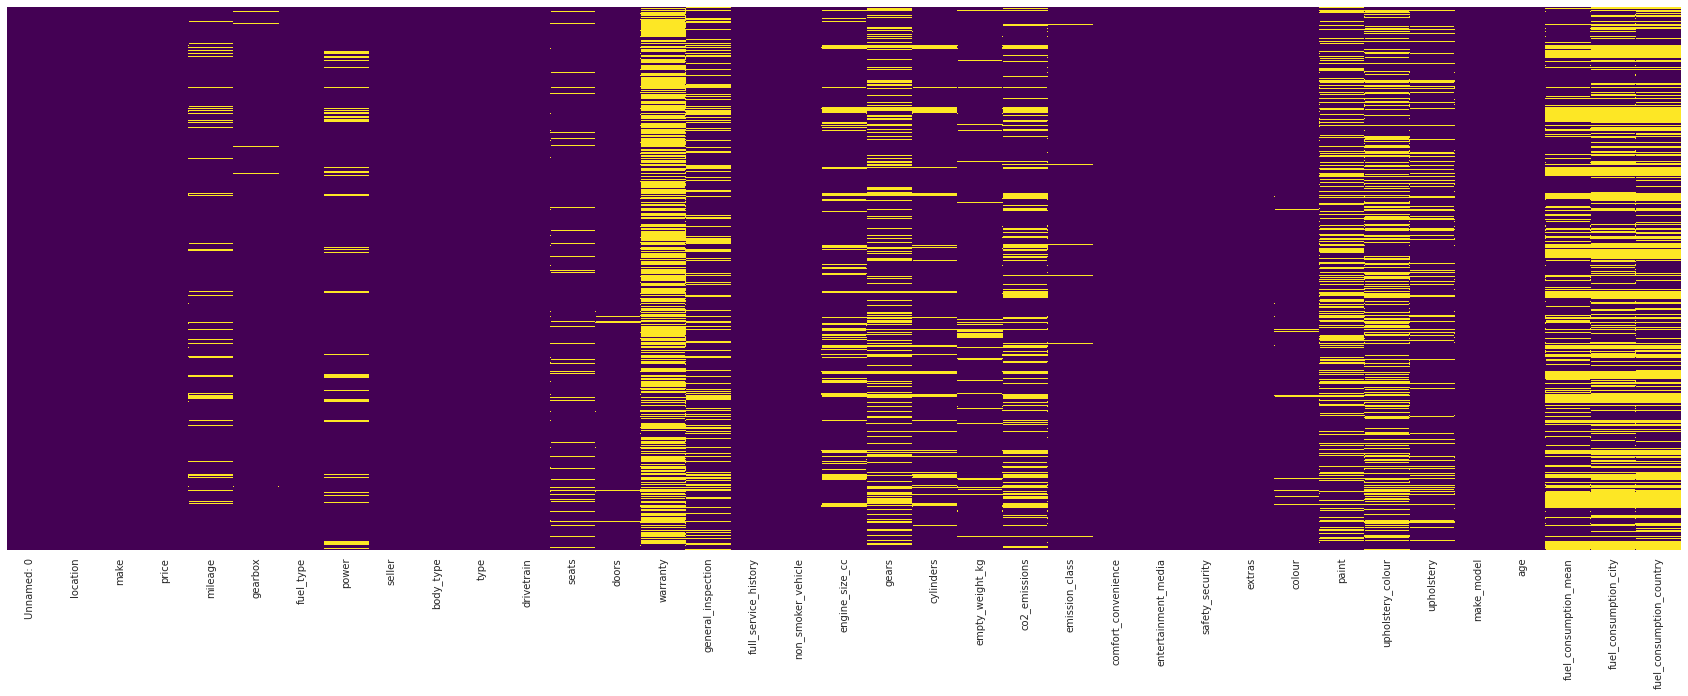

In [964]:
plt.figure(figsize=(30,10))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis');

## age

In [965]:
df.age.unique()

array([10.,  5.,  6., 11., 17., 12.,  8.,  9.,  7.,  4., 13.,  3.,  1.,
       16., 14., 15.,  2.,  0., 18., 37., -6., 21., 20., 19., -3., 22.,
       23., 26., nan, 41., 39., 30., 25., 24., 46., 29., 27., 28., 31.])

Lets check the rows urls having negative ages.

In [966]:
data.loc[df[df.age<0].index,:][['url']]

,url
2070,https://www.autoscout24.com/offers/audi-q2-30-tfsi-sport-pro-line-gasoline-white-700892d4-5d6b-4ce8-b111-650b491c7abd?source=list_searchresults
5735,https://www.autoscout24.com/offers/audi-q5-50-tfsi-e-hybrid-s-edition-nieuw-panodak-s-stoelen-electric-gasoline-grey-b1a56823-0d24-42b1-8b8a-4180d01a7d63?source=list_searchresults


In [967]:
# we checked the urls. Lets adjust the anomalies.
df.age = df.age.replace(-6,4).replace(-3,1)

In [968]:
df.age.value_counts(dropna=False).sort_index()

0.00     1549
1.00     9100
2.00     4387
3.00     3389
4.00     4656
5.00     6107
6.00     5671
7.00     3776
8.00     3135
9.00     3133
10.00    3256
11.00    3285
12.00    2876
13.00    2288
14.00    2331
15.00    1978
16.00    1706
17.00    1596
18.00      21
19.00      16
20.00      14
21.00      13
22.00       8
23.00       6
24.00       3
25.00       6
26.00       4
27.00       2
28.00       1
29.00       3
30.00       2
31.00       1
37.00       1
39.00       1
41.00       1
46.00       1
nan        45
Name: age, dtype: int64

Lets check the nan values.

In [969]:
data.loc[df[df.age.isna()==True].index,['first_registration','type','url']]

,first_registration,type,url
12475,01/2021,"\n,New,\n",https://www.autoscout24.com/offers/bmw-i3-120ah-bev-business-edition-plus-electric-black-54c5b299-21f4-4fe2-b501-b7829d712f78?source=list_searchresults
12552,11/2020,"\n,Used,\n",https://www.autoscout24.com/offers/bmw-i3-business-edition-sport-pack-marge-geen-btw-120ah-electric-black-f1da82f1-a7a5-4021-a011-ba3a94096215?source=list_searchresults
12569,11/2017,"\n,Used,\n",https://www.autoscout24.com/offers/bmw-i3-iperformance-94ah-leder-schuifdak-adaptive-cc-electric-white-7a249931-33fc-4a45-b6e9-66f901b0c785?source=list_searchresults
12570,11/2017,"\n,Used,\n",https://www.autoscout24.com/offers/bmw-i3-basis-94ah-33-kwh-navi-ecc-led-lmv-electric-white-ef2da3d7-6b5b-4d67-b929-b5981d39bc03?source=list_searchresults
12572,12/2020,"\n,Used,\n",https://www.autoscout24.com/offers/bmw-i3-dark-shadow-edition-120ah-42-kwh-8-bijtelling-electric-black-6d35ebb1-6532-4a02-af71-faad74fa2932?source=list_searchresults
14290,05/2016,"\n,Used,\n",https://www.autoscout24.com/offers/ford-focus-5-d-titanium-1-5-150pk-automaat-full-opt-gasoline-black-438e7ba1-e948-4b43-9600-da0edd24e210?source=list_searchresults
14418,03/2020,"\n,Used,\n",https://www.autoscout24.com/offers/ford-fiesta-1-0-ecoboost-st-line-clima-navi-st-verw-1-gasoline-grey-ef8ae15e-10c9-4c2c-a0da-ccd41dc89665?source=list_searchresults
14428,05/2015,"\n,Used,\n",https://www.autoscout24.com/offers/ford-fiesta-1-0-style-navigatie-cruise-airco-apk-10-2022-gasoline-blue-f1f7e41d-73de-4b27-a2af-dbfdd0a409dd?source=list_searchresults
14429,07/2017,"\n,Used,\n",https://www.autoscout24.com/offers/ford-mondeo-1-5-160-pk-dab-navi-clima-gasoline-grey-045fbcd7-0cfa-4b52-90f5-52233787cc36?source=list_searchresults
14430,08/2019,"\n,Used,\n",https://www.autoscout24.com/offers/ford-fiesta-1-0-ecoboost-active-2019-nette-auto-airco-ca-gasoline-orange-e44c7220-ad3c-4984-8b3e-e2addd9637d3?source=list_searchresults


All df.age rows with nan values are new cars. So their age is 0.

In [970]:
df.age = df.age.fillna(0)

In [971]:
df.age.value_counts(dropna=False).sort_index()

0.00     1594
1.00     9100
2.00     4387
3.00     3389
4.00     4656
5.00     6107
6.00     5671
7.00     3776
8.00     3135
9.00     3133
10.00    3256
11.00    3285
12.00    2876
13.00    2288
14.00    2331
15.00    1978
16.00    1706
17.00    1596
18.00      21
19.00      16
20.00      14
21.00      13
22.00       8
23.00       6
24.00       3
25.00       6
26.00       4
27.00       2
28.00       1
29.00       3
30.00       2
31.00       1
37.00       1
39.00       1
41.00       1
46.00       1
Name: age, dtype: int64

Plot df.age and df.mileage relation.

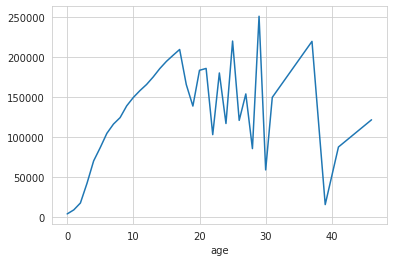

In [972]:
df.groupby('age').mileage.mean().plot()

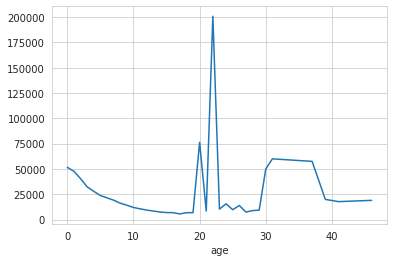

In [973]:
df.groupby('age').price.mean().plot()

We assign 23 to the cars bigger than 22 old. So the anomaly in the plots is eliminated.

In [974]:
df.loc[df[df.age>22].index,'age']=23

In [975]:
df.groupby('age').mileage.mean()

age
0.00      4392.17
1.00      9418.74
2.00     18021.63
3.00     42682.78
4.00     70598.76
5.00     87274.01
6.00    105057.55
7.00    116642.32
8.00    124718.87
9.00    139437.50
10.00   149899.74
11.00   158462.22
12.00   166107.31
13.00   175492.79
14.00   185979.42
15.00   194976.78
16.00   202532.35
17.00   209849.31
18.00   166077.90
19.00   139138.19
20.00   183843.00
21.00   186154.62
22.00   103435.38
23.00   159554.91
Name: mileage, dtype: float64

## mileage

In [976]:
df.mileage.value_counts(dropna=False).sort_index()

1000.00        48
1001.00        60
1002.00         5
1003.00         3
1004.00         1
             ... 
668451.00       1
686968.00       1
827190.00       1
973379.00       1
nan          6294
Name: mileage, Length: 46040, dtype: int64

In [977]:
df.groupby('age').mileage.mean()

age
0.00      4392.17
1.00      9418.74
2.00     18021.63
3.00     42682.78
4.00     70598.76
5.00     87274.01
6.00    105057.55
7.00    116642.32
8.00    124718.87
9.00    139437.50
10.00   149899.74
11.00   158462.22
12.00   166107.31
13.00   175492.79
14.00   185979.42
15.00   194976.78
16.00   202532.35
17.00   209849.31
18.00   166077.90
19.00   139138.19
20.00   183843.00
21.00   186154.62
22.00   103435.38
23.00   159554.91
Name: mileage, dtype: float64

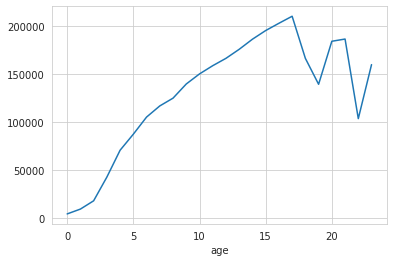

In [978]:
df.groupby('age').mileage.mean().plot()

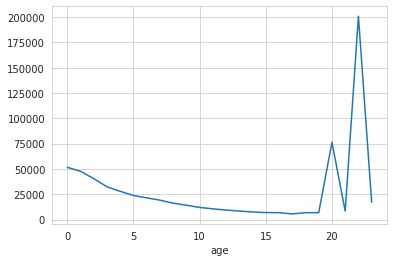

In [979]:
df.groupby('age').price.mean().plot()

We assign 23 to the cars bigger than 22 old. So the anomaly in the plots is eliminated.

In [980]:
df.loc[df[df.age>22].index,'age']=23

In [981]:
df1 = df.groupby('age')['mileage'].mean().to_frame()
df2 = df[df.mileage.isna()==True]['age'].value_counts().sort_index().to_frame()

pd.concat([df1,df2], axis=1).rename(columns={'mileage':'avr_mileage', 
                                             'age':'freq_of_null_mileage_per_age'})

,avr_mileage,freq_of_null_mileage_per_age
0.00,4392.17,1570.00
1.00,9418.74,4384.00
2.00,18021.63,267.00
3.00,42682.78,28.00
4.00,70598.76,7.00
5.00,87274.01,2.00
6.00,105057.55,1.00
7.00,116642.32,3.00
8.00,124718.87,3.00
9.00,139437.50,3.00


In [982]:
df.mileage.fillna(df.groupby("age").mileage.transform("mean"), inplace=True)

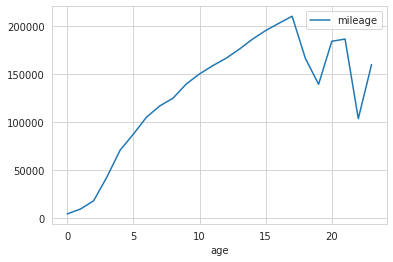

In [983]:
df.groupby('age')['mileage'].mean().to_frame().plot();

## warranty

In [984]:
perc_nans(df.warranty)

64.86297539149888

In [985]:
df.warranty.unique()

array([nan,  6.,  3.,  1., 12., 26., 60.,  5., 24., 18.,  2., 48., 36.,
       10., 84.,  9.,  4.])

In [986]:
df.warranty = df.warranty.astype('float')

In [987]:
df.warranty.value_counts(dropna=False).sort_index()

1.00       235
2.00         8
3.00      1767
4.00         1
5.00         1
6.00     17683
9.00         1
10.00        1
12.00     1467
18.00       34
24.00     1142
26.00        1
36.00       15
48.00        7
60.00        2
84.00      252
nan      41751
Name: warranty, dtype: int64

In [988]:
df.groupby(['age', 'warranty']).mileage.describe().sort_index()

count      mean       std       min       25%       50%       75%       max
age   warranty                                                                              
0.00  6.00      196.00   4365.82    269.39   1120.00   4392.17   4392.17   4392.17   4392.17
      12.00       9.00   4392.17      0.00   4392.17   4392.17   4392.17   4392.17   4392.17
      24.00      66.00   4392.17      0.00   4392.17   4392.17   4392.17   4392.17   4392.17
      36.00       1.00   4392.17       nan   4392.17   4392.17   4392.17   4392.17   4392.17
      84.00      36.00   4392.17      0.00   4392.17   4392.17   4392.17   4392.17   4392.17
1.00  1.00        1.00  14849.00       nan  14849.00  14849.00  14849.00  14849.00  14849.00
      3.00       46.00   8707.19   3747.04   1000.00   7749.75   9418.74   9565.19  15143.00
      6.00     2554.00   9766.02   6057.30   1000.00   6111.25   9418.74  10000.00  47644.00
      12.00     533.00  10641.23   7603.26   1000.00   5242.00   9418.74  14000.00  43733.00
      18.00      32.00   7625.71   3057.19   1015.00   6710.75   9418.74   9418.74   9950.00
      24.00     562.00   9988.33   5329.06   1000.00   9418.74   9418.74  10000.00  38921.00
      36.00      10.00   7286.37   3096.82   2131.00   5854.00   9418.74   9418.74   9800.00
      48.00       5.00   9321.04   5428.34   1500.00   9418.74   9418.74   9418.74  16849.00
      60.00       1.00   3050.00       nan   3050.00   3050.00   3050.00   3050.00   3050.00
      84.00     210.00   9379.65    566.53   1209.00   9418.74   9418.74   9418.74   9418.74
2.00  2.00        3.00   6350.00   1125.83   5050.00   6025.00   7000.00   7000.00   7000.00
      3.00       20.00  21534.71  16307.86   4898.00  11451.50  17487.32  27576.50  71168.00
      5.00        1.00   6750.00       nan   6750.00   6750.00   6750.00   6750.00   6750.00
      6.00     1739.00  18583.24  12336.02   1000.00   9908.00  16478.00  23990.00  87316.00
      10.00       1.00   9500.00       nan   9500.00   9500.00   9500.00   9500.00   9500.00
      12.00     297.00  19655.16  12832.86   1000.00  10205.00  17880.00  25076.00  88365.00
      18.00       1.00   7950.00       nan   7950.00   7950.00   7950.00   7950.00   7950.00
      24.00     252.00  15944.24  10295.67   1007.00   8226.00  13251.00  20502.75  55300.00
      36.00       1.00  34722.00       nan  34722.00  34722.00  34722.00  34722.00  34722.00
      48.00       1.00  28947.00       nan  28947.00  28947.00  28947.00  28947.00  28947.00
      84.00       4.00  18021.63      0.00  18021.63  18021.63  18021.63  18021.63  18021.63
3.00  1.00        8.00  39099.62  16553.98  13938.00  31924.25  43025.00  48804.00  57204.00
      3.00       49.00  53120.12  41459.62   4589.00  23653.00  42997.00  62369.00 161515.00
      6.00     1474.00  40473.44  24208.21   1015.00  22582.25  35976.00  52774.50 165563.00
      12.00     184.00  42542.42  20308.06   1503.00  28215.75  40948.00  53599.25 110357.00
      24.00      64.00  38356.01  22274.16   5845.00  21478.00  36426.50  50358.25 110511.00
      36.00       2.00  47291.00   1943.13  45917.00  46604.00  47291.00  47978.00  48665.00
      48.00       1.00  48667.00       nan  48667.00  48667.00  48667.00  48667.00  48667.00
4.00  1.00       17.00  62342.47  28822.06  16861.00  42795.00  56925.00  75667.00 124210.00
      3.00      132.00  85265.36  38594.74  10667.00  57895.75  81713.00 117706.00 181746.00
      6.00     2040.00  64965.47  35062.58   1250.00  38752.50  59277.00  84800.25 220410.00
      12.00     139.00  64070.40  32807.22   5135.00  38288.50  61023.00  85494.00 141318.00
      18.00       1.00  85028.00       nan  85028.00  85028.00  85028.00  85028.00  85028.00
      24.00      65.00  58763.85  24292.30   5500.00  42527.00  55300.00  72708.00 115026.00
      26.00       1.00  61500.00       nan  61500.00  61500.00  61500.00  61500.00  61500.00
      60.00       1.00  31950.00       nan  31950.00  31950.00  31950.00  31950.00  31950.00
5.00  1.00       2

In [946]:
df.groupby(['warranty', 'make']).mileage.describe()

count      mean      std       min       25%       50%       75%       max
warranty make                                                                                       
1.00     Audi             21.00 134050.10 42118.86  39040.00 111090.00 130765.00 165350.00 203912.00
         BMW              21.00 129246.76 92535.41  15311.00  71166.00 113304.00 163016.00 445900.00
         Chevrolet         1.00 113793.00      nan 113793.00 113793.00 113793.00 113793.00 113793.00
         Citroen           7.00  87412.71 45978.30  20511.00  53459.50  93199.00 123872.50 143515.00
         Dacia             3.00  75890.33 22110.90  56925.00  63747.50  70570.00  85373.00 100176.00
         Fiat              7.00 101506.43 49422.07  15994.00  86854.00  91850.00 134029.50 160934.00
         Ford              3.00  90945.33 89799.29  16861.00  41009.50  65158.00 127987.50 190817.00
         Honda             4.00 142636.50 59044.54  54071.00 142466.00 171931.00 172101.50 172613.00
         Hyundai           9.00  97914.44 54010.57  13938.00  60014.00  98853.00 142432.00 158899.00
         Kia              10.00 102741.10 52513.45  40957.00  61613.00  99099.50 127725.75 206300.00
         Mazda             6.00 100234.67 71488.01  20497.00  52542.00 101682.00 114499.50 222613.00
         Mercedes-Benz    33.00 115095.21 57277.53  14849.00  69342.00 119727.00 153943.00 256812.00
         Opel             11.00 136940.36 38307.81  86322.00 106491.00 140867.00 160517.00 205218.00
         Peugeot          18.00 115059.11 45767.32  45320.00  82684.75 108091.00 153088.50 194462.00
         Renault          17.00 105916.12 41739.48  50093.00  75503.00 107973.00 128012.00 173986.00
         Skoda             3.00 115950.00 49855.75  66626.00  90764.50 114903.00 140612.00 166321.00
         Toyota            5.00 156156.20 38065.24 115137.00 124990.00 152095.00 183823.00 204736.00
         Volkswagen       25.00 136368.00 68631.04  40308.00  92825.00 124904.00 158366.00 321819.00
         Volvo            31.00 192735.94 70746.30  58691.00 140859.50 186085.00 253424.00 328846.00
2.00     BMW               1.00  99000.00      nan  99000.00  99000.00  99000.00  99000.00  99000.00
         Kia               1.00  91736.00      nan  91736.00  91736.00  91736.00  91736.00  91736.00
         Mazda             1.00 181776.00      nan 181776.00 181776.00 181776.00 181776.00 181776.00
         Mercedes-Benz     1.00   5050.00      nan   5050.00   5050.00   5050.00   5050.00   5050.00
         Peugeot           1.00 136364.00      nan 136364.00 136364.00 136364.00 136364.00 136364.00
         Toyota            3.00  28416.67 37094.75   7000.00   7000.00   7000.00  39125.00  71250.00
3.00     Audi            203.00 134200.53 49235.47   9418.74  98320.50 136888.00 162971.50 269032.00
         BMW             270.00 125896.97 54643.97   6195.00  86800.75 124900.94 158313.50 322344.00
         Chevrolet         9.00 152629.33 70822.94  60842.00  80734.00 189263.00 216058.00 217311.00
         Citroen          42.00 119840.31 56976.06   6559.00  90989.50 127207.50 160976.50 217001.00
         Dacia            11.00 109811.18 48940.89  58343.00  85205.00  90670.00 125173.00 197368.00
         Fiat             56.00  67693.55 54424.97   2500.00   9418.74  61778.00 106409.75 243078.00
         Ford             19.00 100120.84 59912.11  10667.00  64216.50  95000.00 117956.00 230751.00
         Honda            12.00 130165.50 40863.18  67729.00 104564.25 127299.00 165058.75 183669.00
         Hyundai          33.00 121795.45 58278.70  16812.00  78220.00 122459.00 162350.00 227266.00
         Kia              33.00 143270.67 49114.02  21065.00 118880.00 151655.00 165256.00 269938.00
         Mazda            45.00 123897.71 76549.33   4898.00  64063.00 105000.00 177083.00 276970.00
         Mercedes-Benz   184.00 130168.02 58328.62  27517.00  84629.25 117562.00 159768.25 356225.00
         Opel             82.00  93721.30 78951.71   1000.00  13053.25  95039.50 161612

There are too many nan values and when we analyzed these nan values according to the mileage, age and car model columns, we decided that this column does not have healthy data.

In [947]:
df.drop("warranty", axis=1, inplace=True)

## colour

In [948]:
df.colour.unique()

array(['Red', 'Blue', 'Grey', 'Brown', 'Black', 'White', 'Silver',
       'Violet', nan, 'Green', 'Beige', 'Yellow', 'Orange', 'Bronze',
       'Gold'], dtype=object)

In [949]:
df.colour.value_counts(dropna=False).sort_index()

Beige       505
Black     16661
Blue       7744
Bronze       29
Brown      1853
Gold         44
Green       655
Grey      21036
Orange      337
Red        2963
Silver     1568
Violet      158
White      9521
Yellow      252
NaN        1042
Name: colour, dtype: int64

In [950]:
df.groupby(['colour', 'body_type', 'make_model']).mileage.describe()
# [:1500]

count      mean      std       min       25%       50%       75%       max
colour body_type make_model                                                                                          
Beige  Compact   Audi A3                    1.00 159359.00      nan 159359.00 159359.00 159359.00 159359.00 159359.00
                 BMW 320                    1.00 181141.00      nan 181141.00 181141.00 181141.00 181141.00 181141.00
                 BMW 420                    1.00 107136.00      nan 107136.00 107136.00 107136.00 107136.00 107136.00
                 BMW 630                    1.00   9418.74      nan   9418.74   9418.74   9418.74   9418.74   9418.74
                 BMW i3                     2.00  28721.00 30718.13   7000.00  17860.50  28721.00  39581.50  50442.00
...                                          ...       ...      ...       ...       ...       ...       ...       ...
Yellow Van       Honda Jazz                 2.00  65206.00 34733.09  40646.00  52926.00  65206.00  77486.00  89766.00
                 Fiat 500L                  4.00 139916.25 12644.90 124068.00 134611.50 140478.00 145782.75 154641.00
                 Mercedes-Benz Sprinter     1.00 415995.00      nan 415995.00 415995.00 415995.00 415995.00 415995.00
                 Citroen Grand C4 Picasso   2.00 239852.00 43901.43 208809.00 224330.50 239852.00 255373.50 270895.00
                 Volkswagen Sharan          1.00 131445.00      nan 131445.00 131445.00 131445.00 131445.00 131445.00

[6596 rows x 8 columns]

Fill the null values in "colour" by "ffill" according to "make_model" and "body_type".

In [951]:
# Grup Sutunlarina(group_col1 ve group_col2) gore gruplayip, uzerinde calisilan sutunun(col_name) null degerlerini "mode" or "median" or "ffill & bfill ile doldurur.
fill(df, "make_model", "body_type", "colour", "ffill") # method can be "mode" or "median" or "ffill"

Number of NaN :  0
------------------
Grey      21315
Black     16884
White      9760
Blue       7877
Red        3038
Brown      1867
Silver     1601
Green       670
Beige       509
Orange      352
Yellow      257
Violet      163
Gold         46
Bronze       29
Name: colour, dtype: int64


## type

In [952]:
df['type'].value_counts(dropna=False)

Used                 56380
New                   4056
Demonstration         2029
Pre-registered        1066
None                   835
Antique / Classic        2
Name: type, dtype: int64

In [953]:
df.groupby(["type", "make_model", "age"]).mileage.describe()[:1500]

count      mean       std       min       25%       50%       75%       max
type              make           age                                                                               
Antique / Classic Chevrolet      23.00   1.00 122000.00       nan 122000.00 122000.00 122000.00 122000.00 122000.00
                  Opel           23.00   1.00  16051.00       nan  16051.00  16051.00  16051.00  16051.00  16051.00
Demonstration     Audi           1.00   46.00   9241.58   6069.95   1500.00   4000.00   7500.00  15300.00  22500.00
                                 2.00   13.00  15011.59  14476.28   1250.00   4888.00  10000.00  18021.63  45210.00
                                 3.00    4.00  38183.75  35515.01   5425.00   9126.25  35855.00  64912.50  75600.00
                                 4.00    1.00  18200.00       nan  18200.00  18200.00  18200.00  18200.00  18200.00
                                 12.00   1.00 113475.00       nan 113475.00 113475.00 113475.00 113475.00 113475.00
                  BMW            1.00  257.00   7370.66   4914.14   1000.00   3610.00   6999.00   9418.74  35000.00
                                 2.00   12.00  13865.14   7728.87   3252.00   6999.75  14000.00  18383.22  26994.00
                                 4.00    1.00  22686.00       nan  22686.00  22686.00  22686.00  22686.00  22686.00
                                 7.00    1.00  77500.00       nan  77500.00  77500.00  77500.00  77500.00  77500.00
                                 8.00    1.00 119172.00       nan 119172.00 119172.00 119172.00 119172.00 119172.00
                                 9.00    1.00 133175.00       nan 133175.00 133175.00 133175.00 133175.00 133175.00
                  Chevrolet      11.00   1.00  89985.00       nan  89985.00  89985.00  89985.00  89985.00  89985.00
                  Citroen        1.00   47.00   7387.19   4787.37   1050.00   3517.00   6559.00   9418.74  19900.00
                                 2.00   22.00  13721.60   9661.42   1500.00   6587.25  13464.00  17991.22  47950.00
                                 4.00    4.00  22215.25  18344.52   1250.00   9803.75  23805.50  36217.00  40000.00
                                 6.00    1.00 115572.00       nan 115572.00 115572.00 115572.00 115572.00 115572.00
                                 10.00   1.00  24696.00       nan  24696.00  24696.00  24696.00  24696.00  24696.00
                  Dacia          0.00    2.00   4392.17      0.00   4392.17   4392.17   4392.17   4392.17   4392.17
                                 1.00   42.00   6825.52   3431.08   1001.00   4503.50   7000.00   9418.74  14500.00
                                 3.00    1.00  39277.00       nan  39277.00  39277.00  39277.00  39277.00  39277.00
                  Fiat           1.00   74.00   6941.34   4643.64   1000.00   3568.75   6145.00   9418.74  28000.00
                                 2.00   21.00   6997.71   4192.81   1996.00   4101.00   6195.00   7950.00  17500.00
                                 3.00    3.00  20343.33  11409.22  12589.00  13793.00  14997.00  24220.50  33444.00
                                 4.00    2.00  39239.00  27929.30  19490.00  29364.50  39239.00  49113.50  58988.00
                                 7.00    1.00 144345.00       nan 144345.00 144345.00 144345.00 144345.00 144345.00
                  Ford           1.00    5.00   7542.90   4846.72   1421.00   3899.00   9418.74   9418.74  13557.00
                                 2.00    7.00  13816.86   9663.24   4500.00   6250.00  10251.00  19608.50  30250.00
                                 4.00    1.00  56627.00       nan  56627.00  56627.00  56627.00  56627.00  56627.00
                  Honda          1.00   57.00   5184.39   3791.56   1000.00   2312.00   4025.00   7102.00  18842.00
                                 2.00   13.00  10773.05   7851.40   1260.00   5715.00   9867.00  11300.00  33012.00
                                 4.00    1.00  29300.00       nan  29300.00  29300.00  29300.00 

In [954]:
df.type.unique()

array(['Used', 'None', 'Demonstration', 'Pre-registered', 'New',
       'Antique / Classic'], dtype=object)

In [955]:
condition_1 = (df.type=='None') & (df.age==0)
condition_2 = (df.type=='None') & (df.age>30)

df.loc[condition_1,'type'] = df.loc[condition_1,'type'].replace('None','New')
df.loc[condition_2,'type'] = df.loc[condition_2,'type'].replace('None','Antique / Classic')

In [989]:
df.type = df.type.replace('None',np.nan)

In [998]:
# Grup Sutunlarina(group_col1 ve group_col2) gore gruplayip, uzerinde calisilan sutunun(col_name) null degerlerini "mode" or "median" or "ffill & bfill ile doldurur.
fill(df, "make_model", "age", "type", "ffill") # method can be "mode" or "median" or "ffill"

Number of NaN :  0
------------------
Used                 57190
New                   4061
Demonstration         2046
Pre-registered        1070
Antique / Classic        1
Name: type, dtype: int64


## body_type

In [1000]:
df['body_type'].value_counts(dropna=False)

Off-Road/Pick-up    17436
Compact             13909
Station wagon       11959
Van                  6756
Sedan                5652
Convertible          3045
Transporter          2229
Coupe                1945
None                  848
Other                 583
Panel van               3
Flatbed van             2
Car transport           1
Name: body_type, dtype: int64

In [1006]:
df.body_type = df.body_type.replace('None', np.nan).replace("Other", np.nan)

In [1007]:
df['body_type'].value_counts(dropna=False)

Off-Road/Pick-up    17436
Compact             13909
Station wagon       11959
Van                  6756
Sedan                5652
Convertible          3045
Transporter          2229
Coupe                1945
NaN                  1431
Panel van               3
Flatbed van             2
Car transport           1
Name: body_type, dtype: int64

Firstly grouped by make_model and fill body_type by mode.

In [1008]:
# Grup Sutununa(group_col) gore gruplayip, uzerinde calisilan sutunun(col_name) null degerlerini mode ile doldurur.
fill_most(df, "make_model", "body_type") 

Number of NaN :  0
------------------
Off-Road/Pick-up    17677
Compact             14293
Station wagon       12234
Van                  6865
Sedan                5753
Convertible          3081
Transporter          2487
Coupe                1972
Panel van               3
Flatbed van             2
Car transport           1
Name: body_type, dtype: int64


# 3-Outlier Analysis